In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_64.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_48.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_188.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_60.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_17.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_131.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_64.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_158.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_36.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_91.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_93.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/engli

In [ ]:
fname = (path/"images").ls()[0]

In [ ]:
type(fname), fname.name, dir(fname)

(pathlib.PosixPath,
 'scottish_terrier_64.jpg',
 ['__bytes__',
  '__class__',
  '__class_getitem__',
  '__delattr__',
  '__dir__',
  '__doc__',
  '__enter__',
  '__eq__',
  '__exit__',
  '__format__',
  '__fspath__',
  '__ge__',
  '__getattribute__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__rtruediv__',
  '__setattr__',
  '__sizeof__',
  '__slots__',
  '__str__',
  '__subclasshook__',
  '__truediv__',
  '_accessor',
  '_cached_cparts',
  '_cparts',
  '_drv',
  '_flavour',
  '_format_parsed_parts',
  '_from_parsed_parts',
  '_from_parts',
  '_hash',
  '_make_child',
  '_make_child_relpath',
  '_orig___repr__',
  '_parse_args',
  '_parts',
  '_pparts',
  '_root',
  '_str',
  'absolute',
  'anchor',
  'as_posix',
  'as_uri',
  'chmod',
  'cwd',
  'delete',
  'drive',
  'exists',
  'expanduser',
  'glob',
  'group',
  'hardlink_to',
  'home',
  'is_ab

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['scottish_terrier']

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images")

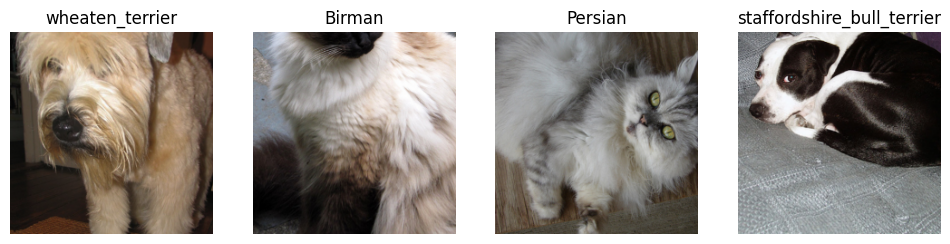

In [ ]:
#### befor training your data always check the data

dls.show_batch(nrows=1, ncols=4)

In [ ]:
class_labels = dls.vocab
class_labels

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
### train the model asap because might not need lot of data and data should train the model and change the loss

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 62.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.522303,0.326736,0.108931,41:21


epoch,train_loss,valid_loss,error_rate,time
0,0.524116,0.339908,0.110961,1:00:01
1,0.339707,0.208485,0.075778,1:00:07


In [ ]:
### get a batch fron real data

x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [ ]:
y

TensorCategory([ 4,  2, 30, 23, 30, 26,  0,  0,  4, 36, 21, 14,  9, 26, 13, 21,
                16, 13, 20, 34, 24, 20, 16, 22, 24,  5,  0, 12,  2, 29, 28,  4,
                18, 35,  8, 16,  0, 21,  9, 12, 36, 33,  1,  8, 24, 19, 15, 21,
                30,  6, 21,  3,  5, 23,  8, 26, 16, 29,  2,  4, 32, 14, 18, 24])

In [ ]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

tensor([6.1025e-06, 1.3387e-07, 3.2060e-08, 4.8796e-07, 9.9758e-01, 3.7615e-06,
        2.3670e-08, 3.8297e-07, 9.8560e-08, 2.3955e-03, 8.0809e-07, 5.0835e-06,
        1.7352e-07, 1.9246e-08, 1.2680e-08, 8.7158e-08, 9.4777e-08, 7.8116e-07,
        1.4307e-09, 8.1282e-10, 2.0141e-06, 1.2892e-08, 2.3653e-08, 4.8423e-08,
        3.1224e-07, 7.6038e-09, 9.5981e-09, 7.4726e-07, 8.1783e-08, 1.0165e-07,
        9.1793e-09, 1.0117e-07, 1.8551e-08, 9.3589e-08, 1.7260e-07, 6.7465e-08,
        1.3107e-08])

In [ ]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [ ]:
acts = torch.randn((6, 2))*2
acts

tensor([[ 0.6279,  3.4321],
        [-1.9385, -0.4416],
        [ 0.7516, -0.1785],
        [-2.1542, -2.0237],
        [ 2.4737,  0.8954],
        [ 3.5066, -0.9271]])

In [ ]:
acts.sigmoid()

tensor([[0.6520, 0.9687],
        [0.1258, 0.3914],
        [0.6795, 0.4555],
        [0.1039, 0.1167],
        [0.9223, 0.7100],
        [0.9709, 0.2835]])

In [ ]:
(acts[:, 0]-acts[:, 1]).sigmoid()

tensor([0.0571, 0.1829, 0.7171, 0.4674, 0.8290, 0.9883])

In [ ]:
def softmax(acts): return torch.exp(acts)/torch.exp(acts).sum(dim=1, keepdim=True)

In [ ]:
sm_acts = softmax(acts)
sm_acts

tensor([[0.0571, 0.9429],
        [0.1829, 0.8171],
        [0.7171, 0.2829],
        [0.4674, 0.5326],
        [0.8290, 0.1710],
        [0.9883, 0.0117]])

In [ ]:
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, inputs, 1-inputs).log().mean()

In [ ]:
targ = tensor([0, 1, 0, 1, 1, 0])

sm_acts

tensor([[0.0571, 0.9429],
        [0.1829, 0.8171],
        [0.7171, 0.2829],
        [0.4674, 0.5326],
        [0.8290, 0.1710],
        [0.9883, 0.0117]])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.0571, 0.8171, 0.7171, 0.5326, 0.1710, 0.9883])

In [ ]:
from torch import nn

loss_func = nn.CrossEntropyLoss()

loss_func(acts, targ)

tensor(0.9675)

In [ ]:
F.cross_entropy(acts, targ)

tensor(0.9675)

In [ ]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([2.8630, 0.2020, 0.3325, 0.6300, 1.7659, 0.0118])

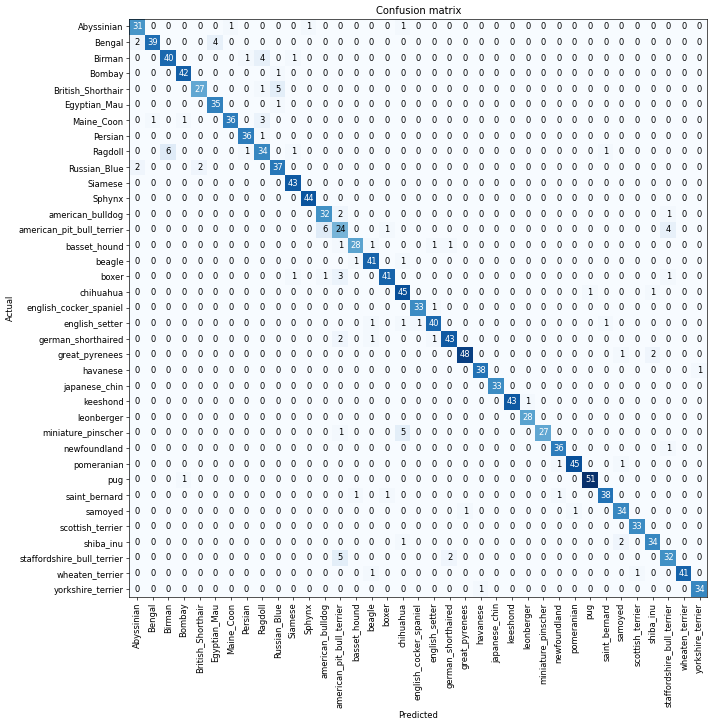

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('miniature_pinscher', 'chihuahua', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
suggested_lrs = learn.lr_find()      # Capture the single returned value
lr_min = suggested_lrs.valley        # Access the desired learning rate from the named tuple

In [ ]:
print(f'min: {lr_min}')

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=lr_min)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, lr_max=lr_min)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, lr_max=1e-5)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, lr_max=3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai2.callback.fp16 import *

learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)